## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [3]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 6s 28ms/step - loss: 1.9682 - accuracy: 0.2882 - val_loss: 1.8033 - val_accuracy: 0.3507
Epoch 2/100
196/196 [==============================] - 6s 32ms/step - loss: 1.7312 - accuracy: 0.3814 - val_loss: 1.6695 - val_accuracy: 0.4100
Epoch 3/100
196/196 [==============================] - 5s 27ms/step - loss: 1.6285 - accuracy: 0.4184 - val_loss: 1.6066 - val_accuracy: 0.4336
Epoch 4/100
196/196 [==============================] - 7s 33ms/step - loss: 1.5677 - accuracy: 0.4419 - val_loss: 1.5687 - val_accuracy: 0.4400
Epoch 5/100
196/196 [==============================] - 7s 36ms/step - loss: 1.5163 - accuracy: 0.4586 - val_loss: 1.5166 - val_accuracy: 0.4583
Epoch 6/100
196/196 [==============================] - 7s 37ms/step - loss: 1.4738 - accuracy: 0.4741 - val_loss: 1.4887 - val_accuracy: 0.4671
Epoch 7/100
196/196 [==============================] - 7s 36ms/step - loss: 1.4429 - accuracy: 0.4853 - val_loss: 1.4759 - val_accuracy:

196/196 [==============================] - 5s 24ms/step - loss: 0.5396 - accuracy: 0.8080 - val_loss: 2.0146 - val_accuracy: 0.5118
Epoch 58/100
196/196 [==============================] - 4s 23ms/step - loss: 0.5335 - accuracy: 0.8071 - val_loss: 2.0239 - val_accuracy: 0.5034
Epoch 59/100
196/196 [==============================] - 5s 27ms/step - loss: 0.5309 - accuracy: 0.8089 - val_loss: 2.1196 - val_accuracy: 0.5064
Epoch 60/100
196/196 [==============================] - 9s 47ms/step - loss: 0.5142 - accuracy: 0.8167 - val_loss: 2.0891 - val_accuracy: 0.5034
Epoch 61/100
196/196 [==============================] - 7s 33ms/step - loss: 0.5219 - accuracy: 0.8113 - val_loss: 2.1439 - val_accuracy: 0.5183
Epoch 62/100
196/196 [==============================] - 6s 30ms/step - loss: 0.4815 - accuracy: 0.8272 - val_loss: 2.1247 - val_accuracy: 0.5150
Epoch 63/100
196/196 [==============================] - 5s 26ms/step - loss: 0.4916 - accuracy: 0.8229 - val_loss: 2.1423 - val_accuracy: 0.511

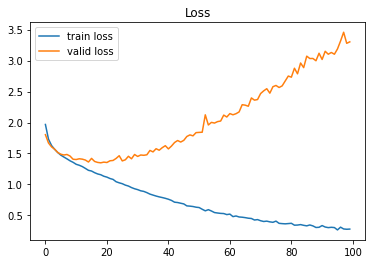

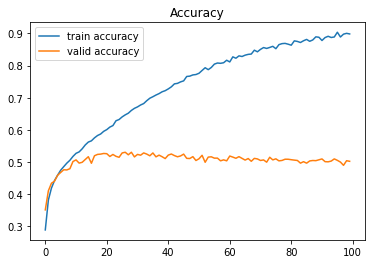

In [13]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度